<h1><center>How Much Do You Know About CoVid19 In Each Country?</center></h1>
<h3><center>Coronavirus Spreading Trend Analysis</center></h3>
<h3><center>By Siyuan Zhao</center></h3>

<h3>1. Introduction</h3>
<p>The 2019-nCoV is a contagious coronavirus that can date back to early December 2019. This new strain of virus has striked fear in many countries as cities are quarantined and hospitals are overcrowded. This dataset will help us understand how 2019-nCoV is spread aroud the world. Fortunately, Johns Hopkins University (JHU) has open-sourced this dataset. Their dataset is transformed into a format that is easier to handle (into a csv format). This dataset would serve as a starting point for people to gather more data about epidemics, not just statistics, but also new stories, government responses etc.</p>

<p>With the dataset, I want to understand the spreading trend of coronavirus across each country and combine the usage of data visualization technics to create a UI control to better visualize the insights and results to the researchers in need. I am hoping my analysis about coronavirus spreading trend can help identify the growing trend of this pandemic so each country might develop its own strategy to deal with the virus.</p>

In [9]:
import os
import sys
import re
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import ipywidgets
import geopandas as gpd
from datetime import date, datetime

<h3>2. Exploratory Data Analysis</h3>

- The name of the dataset is **Time Series Covid19 Confirmed Global**
- I obtain this dataset from github: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
- You can download the raw data from the above github link which is an open source dataset.
- What I have done for this part of analysis is to explore the data through data manipulation and data visualization. What works in this session is the spreading trend of the sample countries are all going up in a reasonable way and what did not work in this session is the scale of the spreading trend. We will further validate the data in the next working session.
- The dataset is in csv format and the csv file is about 926kB and the dataset has 280 rows and 665 columns. The column names as shown as such:
    - Country/Region: country/region name *(data type: string)*
    - Lat: latitude of the country/region *(data type: float)*
    - Long: longitude of the country/region *(data type: float)*
    - 1/22/20: start date of summarizing confirmed cases *(data type: int)*
    - 11/13/21: latest date of summarizing confirmed cases (updated on a daily basis) *(data type: int)*

In [10]:
data = pd.read_csv('time_series_covid19_confirmed_global.csv').drop(columns = ['Province/State'])
print('Total number of country: %d'%data['Country/Region'].nunique())
print('Dataset shape:', data.shape)
data.head()

Total number of country: 196
Dataset shape: (280, 665)


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899


<h4>2.1 Basic Data Cleaning</h4>

- In this section, I performed basic data cleaning to check the duplicate records in the data and so as to remove them. 
- I specifically change the country "USA" to be "United States of American" just to help the mapping with other datasets

In [11]:
# Remove duplicated country/region
data = data.drop_duplicates(['Country/Region'])
data.loc[255, 'Country/Region'] = 'United States of America'

<h4>2.2 Data Visualization</h4>

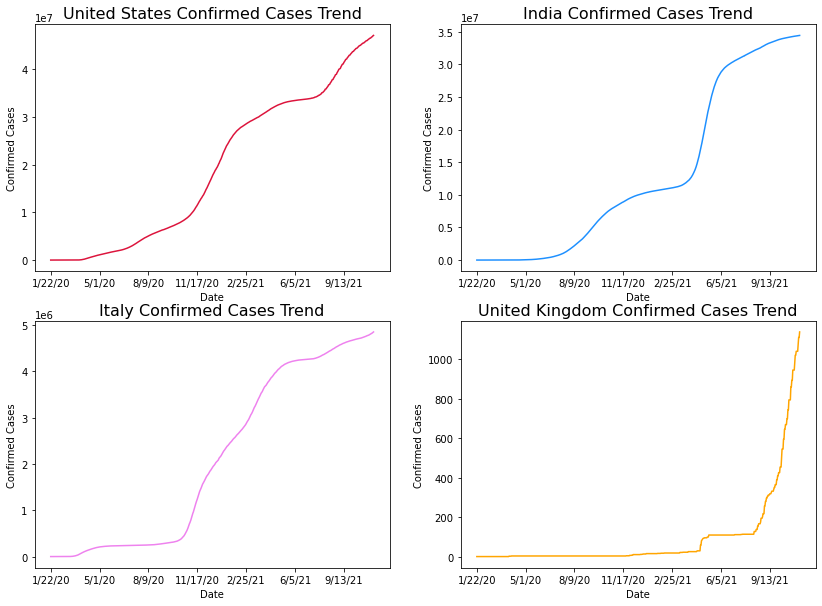

In [16]:
# Comparing the confirmed case trend between US and India
india = data[data['Country/Region'] == 'India'].iloc[0, 3:]
us = data[data['Country/Region'] == 'United States of America'].iloc[0, 3:]
italy = data[data['Country/Region'] == 'Italy'].iloc[0, 3:]
uk = data[data['Country/Region'] == 'United Kingdom'].iloc[0, 3:]
fig, ax = plt.subplots(2, 2, figsize = (14, 10))
us.plot(ax = ax[0][0], color = 'crimson')
ax[0][0].set_title('United States Confirmed Cases Trend', fontsize = 16)
ax[0][0].set_xlabel('Date')
ax[0][0].set_ylabel('Confirmed Cases')
india.plot(ax = ax[0][1], color = 'dodgerblue')
ax[0][1].set_title('India Confirmed Cases Trend', fontsize = 16)
ax[0][1].set_xlabel('Date')
ax[0][1].set_ylabel('Confirmed Cases')
italy.plot(ax = ax[1][0], color = 'violet')
ax[1][0].set_title('Italy Confirmed Cases Trend', fontsize = 16)
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('Confirmed Cases')
uk.plot(ax = ax[1][1], color = 'orange')
ax[1][1].set_title('United Kingdom Confirmed Cases Trend', fontsize = 16)
ax[1][1].set_xlabel('Date')
ax[1][1].set_ylabel('Confirmed Cases')
plt.show()

<h3>3. Interactive Dashboard</h3>

- In the below interactive dashboard I created, you should be able to see a comprehensive visualization showing the 
    1) The countries having Covid19;
    2) The spreading speed of Covid19 starting from 1/22/2020 to 11/13/2021;
    3) The growth trend of Covid19 starting from 1/22/2020 to 11/13/2021
- The dashboard is created in an interactive way to give the audience an opportunity to toggel the variables to see the growing trend of Covid19, there are two variables you can toggle with:
    1) Days (number of days passed since 1/22/2020, it will be 661 days passed till 11/13/2021)
    2) Country (there are 196 countries in this section, select one of the options to see the growing trend of Covid19 in that country)
- One more contextual dataset I used besides the covid19 dataset I used above is the geographical world map dataset which can be downloaded directly using GeoPandas API. 
    1) The dataset is shown below with 6 columns as ***pop_est, continent, name, iso_a3, gdp_md_est, geometry***
    2) The reason as for why this dataset might be useful is I can join the covid19 data to this geographical dataset which gives me more information to generate better and clearer visualization plots from a world map view

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


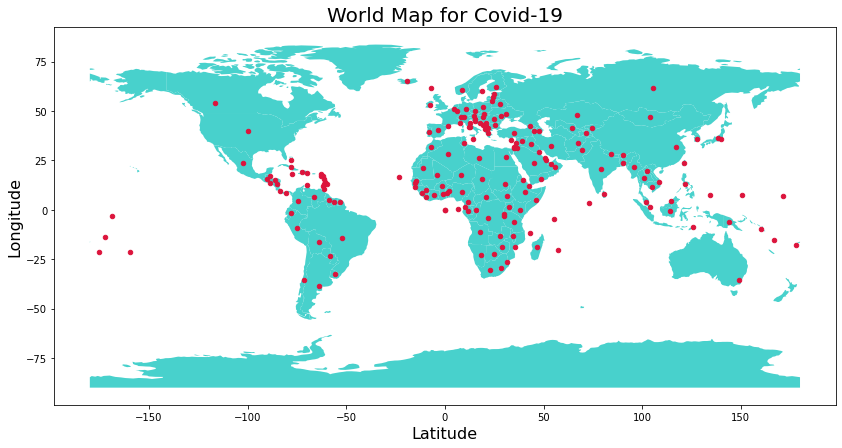

In [13]:
date_diff = datetime.strptime('11/13/21', '%m/%d/%y') - datetime.strptime('1/22/20', '%m/%d/%y')
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df = pd.merge(data, countries, left_on = 'Country/Region', right_on = 'name', how = 'left')
df = df[df['name'].notnull()]
fig, ax = plt.subplots(figsize = (14, 14))
countries.plot(color = 'mediumturquoise', ax = ax)
data[['Lat', 'Long']].plot(x = 'Long', y = 'Lat', kind = 'scatter', color = 'crimson', ax = ax)
ax.set_title('World Map for Covid-19', fontsize = 20)
ax.set_xlabel('Latitude', fontsize = 16)
ax.set_ylabel('Longitude', fontsize = 16)
countries.head()

<h4>3.1 Interactive Dashboard Instruction</h4>

- The below interactive dashboard provides you an opportunity to explore the CoVid19 growing trend in each country separately.
- What you will see on the top is a slider and drop down menu for you to select the days since the first Covid19 case confirmed and the country of your interest
- In the first plot, a country is plotted and a red dot indicating the size of CoVid19 spreading influence and in the second plot, a growing trend of CoVid19 is plotted so that you can see the number of confirmed cases with the time goes by
- **Please togger the slider and the drop down menu to show the growing trend of CoVid19 in each country**

In [17]:
@ipywidgets.interact(days = (0, date_diff.days, 1), country = df['name'].values.tolist())
def covidViz(days, country):
    global countries, df
    # Country map visualization
    fig, ax = plt.subplots(1, 2, figsize = (14, 7))
    countries[countries['name'] == country].plot(color = 'mediumturquoise', ax = ax[0])
    covid_country = df[df['name'] == country]
    covid_country[['Lat', 'Long']].plot(x = 'Long', y = 'Lat', kind = 'scatter', s = 100, color = 'crimson', ax = ax[0])
    ax[0].grid(alpha = 0.25)
    ax[0].set_title(country, fontsize = 16)
    ax[0].set_xlabel('Longitude', fontsize = 14)
    ax[0].set_ylabel('Latitude', fontsize = 14)
    radius = (covid_country.iloc[0, 3:-6] / covid_country.iloc[0, 3:-6].max()).iloc[days]
    circle = plt.Circle((covid_country['Long'].iloc[0], covid_country['Lat'].iloc[0]), radius * 2, color = 'crimson', fill = 'crimson')
    ax[0].add_patch(circle)

    # Trend visualization
    covid_time = covid_country.iloc[0, 3:-6]
    covid_time.plot(ax = ax[1], color = 'dodgerblue')
    ax[1].grid(alpha = 0.25)
    ax[1].set_title(f'{country} Confirmed Cases', fontsize = 16)
    ax[1].set_xlabel('Date', fontsize = 14)
    ax[1].set_ylabel('Confirmed Cases', fontsize = 14)
    ax[1].plot(days, covid_time.iloc[days], marker = 'o', markersize = 12, color = 'crimson')
    plt.show()

interactive(children=(IntSlider(value=330, description='days', max=661), Dropdown(description='country', optio…

<h3>4. Other Visualization (Similarity Analysis)</h3>

In this analysis, I also tried to perform similarity analysis to compare the growing trend similarity among countries. The goal is to find the most similar pair of countries that share the same CoVid19 growing pattern. By doing this analysis, I can provide great insights for the audience or the policy makers to identify the similarity of policies or strategies with other countries. Our assumption is that the more similar the growing trend of CoVid19, the more similar the policies are between this country pair. For example, if USA has the most similarity score with India than any other countries, then I believe USA has more or less the same policies or strategies as India when the goverment is dealing with the virus

In order to address the issue of population, I will standardize the confirmed cases of each day in each country. By doing that, I am standardizing all the data so each country can be compared or we will be comparing apple with banana. I will perform mean normalization which is formulated as 

X' = X - average(x) / (max(x) - min(x))

Below is an interactive dashboard that shows the relative similarity score between two countries. From the drop down menu, you can select one country of your interest, the algorithm will automatically calculate the similarity score among all the other countries in order to find the country that shares the most similary growing pattern of CoVid19

From this dashboard, I want to provide great insights for people who are interested in seeing their own countries behavior versus other countries and possibly find the similar relationship between their own countries versus other countries. 

In [15]:
@ipywidgets.interact(country = df['name'].values.tolist())
def similarityViz(country):
    global countries, df
    # Country map visualization
    fig, ax = plt.subplots(1, 3, figsize = (21, 7))
    
    # Calculate similarity
    countries_sub = df.iloc[:, :-6].drop(columns = ['Lat', 'Long'])
    row_mean = countries_sub.iloc[:, 1:].mean(axis = 1)
    row_max = countries_sub.iloc[:, 1:].max(axis = 1)
    row_min = countries_sub.iloc[:, 1:].min(axis = 1)
    countries_data = countries_sub.iloc[:, 1:].apply(lambda col : (col - row_mean) / (row_max - row_min))
    countries_sub = pd.concat([countries_sub.iloc[:, 0], countries_data], axis = 1)

    similarity_df = DataFrame(np.zeros((len(countries_sub), len(countries_sub))), index = countries_sub['Country/Region'], columns = countries_sub['Country/Region'])
    for i in range(len(countries_sub)):
        for j in range(len(countries_sub)):
            if i == j:
                similarity_df.iloc[i, j] = np.nan
            else:
                diff = countries_sub.iloc[i, 1:] - countries_sub.iloc[j, 1:]
                distance = np.sqrt(np.dot(diff.T, diff))
                similarity_df.iloc[i, j] = distance
    similar_country = similarity_df.loc[country,].sort_values().index[0]
    
    # Plot main country
    countries[countries['name'] == country].plot(color = 'mediumturquoise', ax = ax[0])
    covid_country1 = df[df['name'] == country]
    covid_country1[['Lat', 'Long']].plot(x = 'Long', y = 'Lat', kind = 'scatter', s = 100, color = 'crimson', ax = ax[0])
    ax[0].grid(alpha = 0.25)
    ax[0].set_title(country, fontsize = 16)
    ax[0].set_xlabel('Longitude', fontsize = 14)
    ax[0].set_ylabel('Latitude', fontsize = 14)
    radius = (covid_country1.iloc[0, 3:-6] / covid_country1.iloc[0, 3:-6].max()).iloc[0]
    circle = plt.Circle((covid_country1['Long'].iloc[0], covid_country1['Lat'].iloc[0]), radius * 2, color = 'crimson', fill = 'crimson')
    ax[0].add_patch(circle)
    
    # Plot similar country
    countries[countries['name'] == similar_country].plot(color = 'deeppink', ax = ax[1])
    covid_country2 = df[df['name'] == similar_country]
    covid_country2[['Lat', 'Long']].plot(x = 'Long', y = 'Lat', kind = 'scatter', s = 100, color = 'crimson', ax = ax[1])
    ax[1].grid(alpha = 0.25)
    ax[1].set_title(similar_country, fontsize = 16)
    ax[1].set_xlabel('Longitude', fontsize = 14)
    ax[1].set_ylabel('Latitude', fontsize = 14)
    radius = (covid_country2.iloc[0, 3:-6] / covid_country2.iloc[0, 3:-6].max()).iloc[0]
    circle = plt.Circle((covid_country2['Long'].iloc[0], covid_country2['Lat'].iloc[0]), radius * 2, color = 'crimson', fill = 'crimson')
    ax[1].add_patch(circle)
    
    # Trend visualization
    covid_time1 = countries_sub[countries_sub['Country/Region'] == country].iloc[0, 1:]
    covid_time1.plot(ax = ax[2], color = 'mediumturquoise')
    covid_time2 = countries_sub[countries_sub['Country/Region'] == similar_country].iloc[0, 1:]
    covid_time2.plot(ax = ax[2], color = 'deeppink')
    ax[2].grid(alpha = 0.25)
    ax[2].set_title(f'{country} vs {similar_country} Mean Normalized', fontsize = 16)
    ax[2].set_xlabel('Date', fontsize = 14)
    ax[2].set_ylabel('Mean Normalized Confirmed Cases', fontsize = 14)
    plt.show()

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', …

<h3>5. Citation</h3>

- Dataset 1: **Time Series Covid19 Confirmed Global** from github: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
- Dataset 2: **World Map Dataset** from ```gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))```